In [1]:
from pennylane import numpy as np
from sklearn.model_selection import train_test_split
import random

In [2]:
with open('../../Datasets/normalized_heart_slimmed.csv') as f:
    temp = np.loadtxt(f, delimiter=',', skiprows=1)

X = temp[:,:-1]
y = temp[:,-1]
y = np.tensor([-1 if i == 0 else 1 for i in y])

feats_train, feats_test, Y_train, Y_test = train_test_split(X, y,train_size=0.7,random_state=42)


In [3]:
from sklearn.linear_model import LogisticRegression

In [4]:
clf = LogisticRegression(random_state=0).fit(feats_train, Y_train)
clf.score(feats_train, Y_train)

0.8584905660377359

In [5]:
clf.score(feats_test, Y_test)

0.8241758241758241

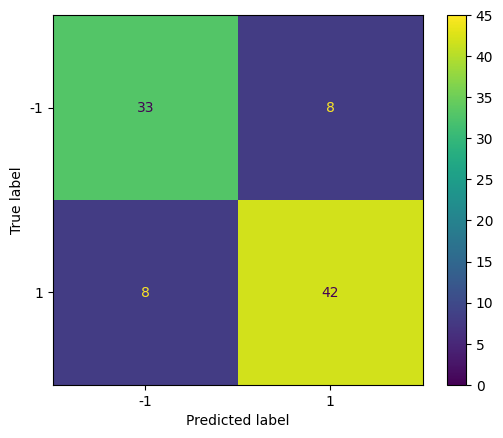

In [6]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

import matplotlib.pyplot as plt

predictions_test = clf.predict(feats_test)

cm = confusion_matrix(Y_test, predictions_test, labels=[-1,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[-1,1],)
disp.plot()
disp.im_.set_clim(0, 45)
plt.show()